In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel('/content/Supplementary data 3.xlsx')

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

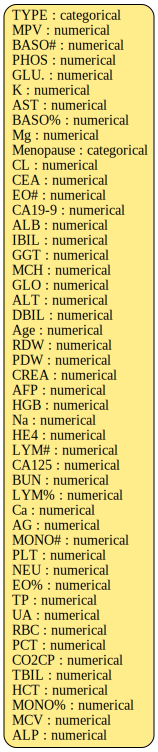

In [ ]:
metadata.visualize()

In [ ]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=2000)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthesizer = TVAESynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500
)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


In [ ]:
synthetic_data.to_csv('synthetic_data_tvae.csv', index=False)


In [ ]:
print(len(synthetic_data))

2000


In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 49/49 [00:00<00:00, 1630.57it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 132.37it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    df,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 49/49 [00:00<00:00, 458.11it/s]|
Column Shapes Score: 84.57%

(2/2) Evaluating Column Pair Trends: |██████████| 1176/1176 [00:06<00:00, 178.58it/s]|
Column Pair Trends Score: 93.24%

Overall Score (Average): 88.91%



In [ ]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,TYPE,TVComplement,0.872277
1,MPV,KSComplement,0.764021
2,BASO#,KSComplement,0.950404
3,PHOS,KSComplement,0.834691
4,GLU.,KSComplement,0.822415
5,K,KSComplement,0.874138
6,AST,KSComplement,0.747351
7,BASO%,KSComplement,0.715968
8,Mg,KSComplement,0.816394
9,Menopause,TVComplement,0.908021


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='TYPE',
    metadata=metadata
)

fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
df2 = pd.read_csv('/content/synthetic_data.csv')
# Select features (excluding the 'SUBJECT_ID' and the target 'TYPE')
X = df2.drop(columns=['TYPE'])
y = df2['TYPE']

# Standardize the features for better performance in logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's inspect the shapes to make sure everything looks correct
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 48), (400, 48), (1600,), (400,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
len(X_train)

1600

In [ ]:
# Get the feature coefficients (weights)
coefficients = log_reg.coef_[0]

# Function to calculate the sigmoid of a value
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to calculate the summary for each data point
def generate_summary(X_test, coefficients, feature_names, model):
    results = []

    # Compute the linear model (dot product of X and coefficients) and the probabilities
    linear_model = np.dot(X_test, coefficients) + model.intercept_[0]
    probabilities = sigmoid(linear_model)

    # Loop through each data point in the test set
    for idx, (sample, prob) in enumerate(zip(X_test, probabilities)):
        # Calculate contributions for all features for this sample
        contributions = sample * coefficients
        absolute_contributions = np.abs(contributions)

        # Find the most important feature (the one with the highest absolute contribution)
        most_important_feature_idx = np.argmax(absolute_contributions)
        most_important_feature = feature_names[most_important_feature_idx]
        contribution_value = contributions[most_important_feature_idx]

        # Add the summary for this data point
        results.append({
            'Data Point': idx + 1,
            'Most Important Feature': most_important_feature,
            'Contribution Value': contribution_value,
            'Predicted Probability (P(y=1))': prob
        })

    # Convert results to a DataFrame
    summary_df = pd.DataFrame(results)

    return summary_df

# Generate the summary for all test samples
summary_table = generate_summary(X_test, coefficients, X.columns, log_reg)

# Display the first few rows of the summary
summary_table.head(20)  # Displaying the top 20 rows for brevity

,Data Point,Most Important Feature,Contribution Value,Predicted Probability (P(y=1))
0,1,Menopause,-1.675566,0.092691
1,2,PDW,-1.491006,0.012320
2,3,Age,1.963244,0.957276
3,4,ALB,0.783983,0.837088
4,5,ALB,-1.206609,0.054848
5,6,PDW,-1.829871,0.193933
6,7,LYM%,1.221729,0.849445
7,8,NEU,1.713262,0.057796
8,9,Age,1.501603,0.987193
9,10,ALB,-1.512095,0.131287


In [ ]:
summary_table['Most Important Feature'].value_counts()

,count
Most Important Feature,
Age,131
Menopause,105
PDW,51
NEU,47
ALB,24
EO#,13
LYM%,12
BASO%,7
CEA,4


FEATURE EXTRACTED INTO AN ARRAY

In [ ]:
# Step 1: Extract the list of important features from the summary table
important_features = summary_table['Most Important Feature'].unique()

# Step 2: Filter the dataset to only include important features
features = [feature for feature in important_features if feature in df2.columns]

# Step 3: Add the important features to X
X = df2[features].values

print(f"Updated X now includes only important features: {features}")

# Step 4: Include the target label
selected_features_df = df2[features + ['TYPE']]  # Assuming 'TYPE' is the target column

# Step 5: Save the selected features to a CSV file
selected_features_df.to_csv('sel_features.csv', index=False)

print("Selected features and labels saved to 'sel_features.csv'.")


Updated X now includes only important features: ['Menopause', 'PDW', 'Age', 'ALB', 'LYM%', 'NEU', 'CEA', 'BASO%', 'EO#', 'MPV', 'MONO#', 'CA125']
Selected features and labels saved to 'sel_features.csv'.


In [ ]:
len(selected_features_df)

2000

for running only customize features

SAINT

Epoch 10/10, Loss: 0.2574, Train Acc: 0.9444, Test Acc: 0.9550

Final Test Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.89      0.94      0.91       100

    accuracy                           0.95       400
   macro avg       0.93      0.95      0.94       400
weighted avg       0.96      0.95      0.96       400


Confusion Matrix:
[[288  12]
 [  6  94]]

ROC-AUC Score: 0.9931


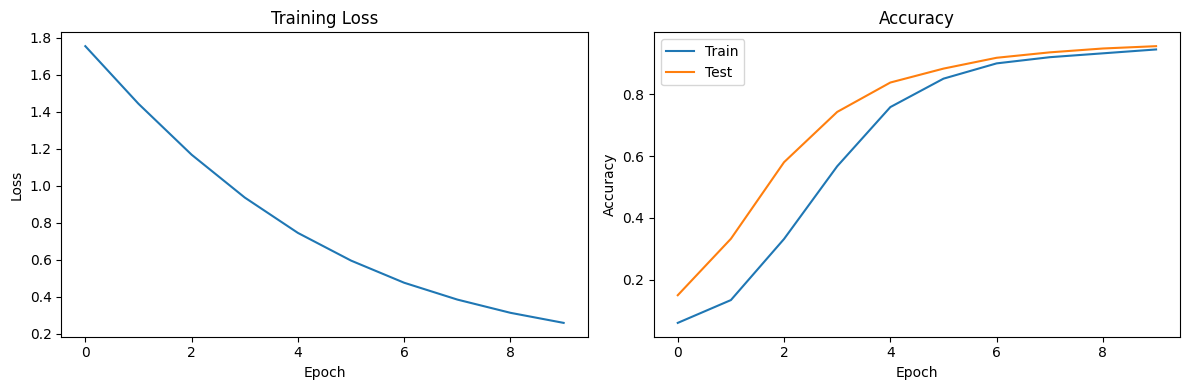

In [ ]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


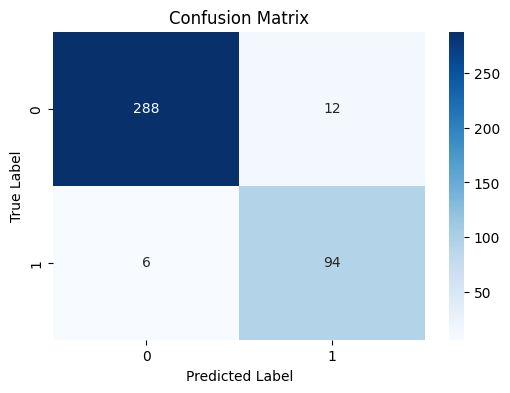

In [ ]:
import seaborn as sns

# Plot Confusion Matrix as a Table
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test.numpy()), yticklabels=set(y_test.numpy()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


LR SCORES SND PROBABILITIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get feature coefficients (weights)
coefficients = log_reg.coef_[0]

# Define feature names (choose correct option)
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns  # ✅ For DataFrame
else:
    feature_names = ['MPV', 'BASO#', 'PHOS', 'GLU.', 'K', 'AST', 'BASO%', 'Mg', 'Menopause', 'CL', 'CEA', 'EO#',
                     'CA19-9', 'ALB', 'IBIL', 'GGT', 'MCH', 'GLO', 'ALT', 'DBIL', 'Age', 'RDW', 'PDW', 'CREA',
                     'AFP', 'HGB', 'Na', 'HE4', 'LYM#', 'CA125', 'BUN', 'LYM%', 'Ca', 'AG', 'MONO#', 'PLT', 'NEU',
                     'EO%', 'TP', 'UA', 'RBC', 'PCT', 'CO2CP', 'TBIL', 'HCT', 'MONO%', 'MCV', 'ALP']  # Use actual column names

# Function to calculate sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to generate feature scores for one row
def get_feature_scores_for_one_row(X_test, coefficients, feature_names, model, row_index=0):
    sample = X_test[row_index]  # NumPy array row extraction

    # Compute linear model (dot product) and probability
    linear_model = np.dot(sample, coefficients) + model.intercept_[0]
    probability = sigmoid(linear_model)

    # Calculate contributions for all features
    contributions = sample * coefficients
    absolute_contributions = np.abs(contributions)

    # Create a DataFrame to store results
    feature_scores_df = pd.DataFrame({
        'Feature': feature_names,
        'Value (x_i)': sample,
        'Coefficient (β_i)': coefficients,
        'Contribution (x_i * β_i)': contributions,
        'Absolute Contribution': absolute_contributions
    })

    # Sort by absolute contribution (most impactful features at top)
    feature_scores_df = feature_scores_df.sort_values(by='Absolute Contribution', ascending=False)

    return feature_scores_df, probability

# Get feature scores for the first row (index 0)
feature_scores, predicted_probability = get_feature_scores_for_one_row(X_test, coefficients, feature_names, log_reg, row_index=0)

# Display results
print(f"Predicted Probability (P(y=1)): {predicted_probability:.4f}\n")
print(feature_scores)


Predicted Probability (P(y=1)): 0.1415

      Feature  Value (x_i)  Coefficient (β_i)  Contribution (x_i * β_i)  \
22        PDW     0.915187           1.009884                  0.924233   
13        ALB    -0.940150           0.544633                 -0.512036   
8   Menopause    -0.582739          -0.770273                  0.448868   
35        PLT    -1.277697          -0.272231                  0.347829   
23       CREA     1.642017           0.185693                  0.304911   
36        NEU     0.364735          -0.773799                 -0.282231   
38         TP     0.797651           0.346746                  0.276582   
27        HE4    -0.812922          -0.315368                  0.256370   
12     CA19-9     1.165557          -0.216138                 -0.251921   
15        GGT     1.374621          -0.173205                 -0.238091   
26         Na    -0.956267          -0.247217                  0.236405   
10        CEA     1.206491          -0.184990               

In [ ]:
import pandas as pd

# Convert X_test to a DataFrame (if it's a NumPy array)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Select the row used for feature scoring
row_index = 0  # Change this index if needed
sample_row = X_test_df.iloc[row_index]

# Print the row
print("Sample Row Used for Feature Scoring:")
print(sample_row.to_frame().T)  # Transpose for better readability


Sample Row Used for Feature Scoring:
        MPV     BASO#      PHOS      GLU.         K       AST     BASO%  \
0 -0.268956 -1.230208  1.360106 -0.968963 -0.933722 -0.627316  0.367054   

         Mg  Menopause        CL  ...        TP        UA       RBC       PCT  \
0 -1.130307  -0.582739 -0.484606  ...  0.797651  0.442768 -0.053335 -0.734269   

      CO2CP     TBIL       HCT     MONO%       MCV       ALP  
0 -0.076809 -0.60249  0.827734 -1.307052 -0.561348  0.202533  

[1 rows x 48 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load dataset (Replace 'dataset.csv' with the actual file path)
df = pd.read_excel('/content/Supplementary data 3.xlsx')

# Define feature matrix (X) and target variable (y)
X = df.drop(columns=['TYPE'])  # Replace 'target' with actual target column name
y = df['TYPE']  # Replace with actual target column name

# Split dataset (ensure proper splitting if needed)
X_train, X_test, y_train, y_test = X[:-50], X[-50:], y[:-50], y[-50:]

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get feature coefficients
coefficients = log_reg.coef_[0]
feature_names = X.columns if isinstance(X, pd.DataFrame) else list(range(X.shape[1]))

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to compute feature scores for multiple records
def get_feature_scores(X_test, coefficients, feature_names, model):
    results = []
    for row_index in range(len(X_test)):
        sample = X_test.iloc[row_index].values  # Extract row as NumPy array
        linear_model = np.dot(sample, coefficients) + model.intercept_[0]
        probability = sigmoid(linear_model)
        contributions = sample * coefficients
        absolute_contributions = np.abs(contributions)

        for feature, value, coef, contrib, abs_contrib in zip(
            feature_names, sample, coefficients, contributions, absolute_contributions
        ):
            results.append({
                'Patient_Index': row_index,
                'Feature': feature,
                'Value (x_i)': value,
                'Coefficient (β_i)': coef,
                'Contribution (x_i * β_i)': contrib,
                'Absolute Contribution': abs_contrib,
                'Predicted Probability (P(y=1))': probability
            })

    return pd.DataFrame(results)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Compute feature scores
feature_scores_df = get_feature_scores(X_test, coefficients, feature_names, log_reg)

# Identify top 5 most impactful features
top_features_df = (feature_scores_df.groupby('Feature')['Absolute Contribution']
                   .mean()
                   .reset_index()
                   .sort_values(by='Absolute Contribution', ascending=False)
                   .head(5))

# Save feature scores and top features to CSV
feature_scores_df.to_csv('lr_feature_scores.csv', index=False)
top_features_df.to_csv('top_5_features.csv', index=False)

print("Feature scores saved to 'lr_feature_scores.csv'")
print("Top 5 important features saved to 'top_5_features.csv'")


Feature scores saved to 'lr_feature_scores.csv'
Top 5 important features saved to 'top_5_features.csv'


Final Test Accuracy: 0.8775
Best n_estimators: 150
Best learning_rate: 0.1


RuntimeError: matplotlib does not support generators as input

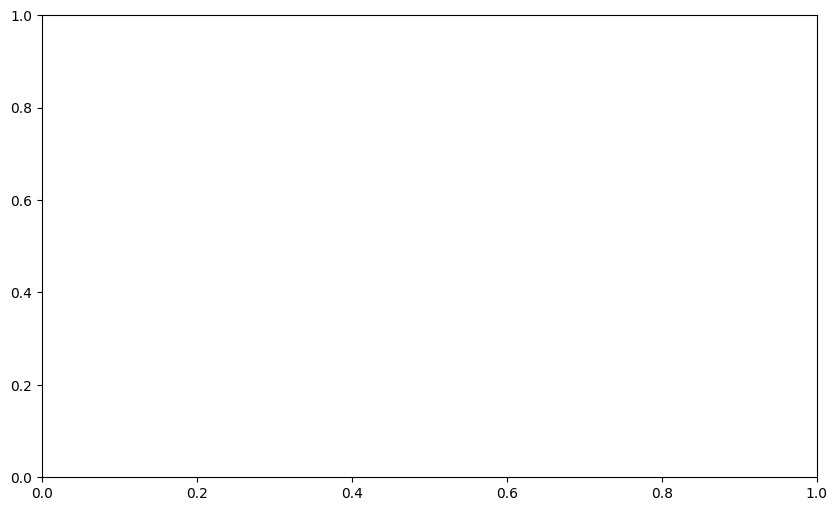

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/synthetic_data.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.drop(columns=['TYPE'])
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001],
}
model = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_n_estimators = best_model.n_estimators
best_learning_rate = best_model.learning_rate

# Final evaluation
final_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# Print the results
print(f"Final Test Accuracy: {final_accuracy:.4f}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best learning_rate: {best_learning_rate}")

# Plot training curves
train_scores = best_model.staged_score(X_train, y_train)  # Get training scores for each estimator
test_scores = best_model.staged_score(X_test, y_test)    # Get testing scores for each estimator

plt.figure(figsize=(10, 6))
plt.plot(range(1, best_n_estimators + 1), train_scores, label='Training Accuracy')
plt.plot(range(1, best_n_estimators + 1), test_scores, label='Testing Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


Columns successfully dropped and features/target separated.
Estimators: 10, Train Acc: 0.8181, Test Acc: 0.8175
Estimators: 20, Train Acc: 0.8581, Test Acc: 0.8350
Estimators: 30, Train Acc: 0.8600, Test Acc: 0.8400
Estimators: 40, Train Acc: 0.8594, Test Acc: 0.8350
Estimators: 50, Train Acc: 0.8581, Test Acc: 0.8350
Estimators: 60, Train Acc: 0.8675, Test Acc: 0.8475
Estimators: 70, Train Acc: 0.8681, Test Acc: 0.8525
Estimators: 80, Train Acc: 0.8731, Test Acc: 0.8650
Estimators: 90, Train Acc: 0.8738, Test Acc: 0.8675
Estimators: 100, Train Acc: 0.8744, Test Acc: 0.8700
Estimators: 110, Train Acc: 0.8750, Test Acc: 0.8725
Estimators: 120, Train Acc: 0.8781, Test Acc: 0.8775
Estimators: 130, Train Acc: 0.8781, Test Acc: 0.8775
Estimators: 140, Train Acc: 0.8794, Test Acc: 0.8775
Estimators: 150, Train Acc: 0.8812, Test Acc: 0.8775
Final Test Accuracy: 0.8775


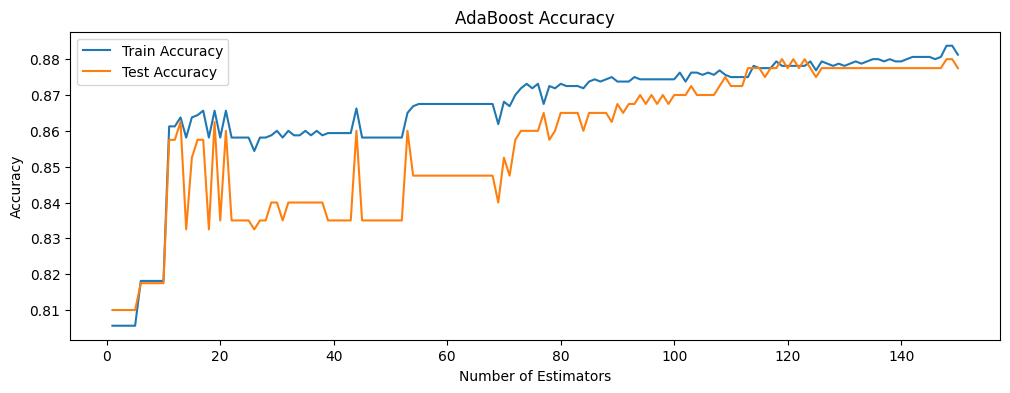

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/synthetic_data_tvae.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.drop(columns=['TYPE'])
y = data['TYPE'].values

print("Columns successfully dropped and features/target separated.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the AdaBoost classifier with a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
model = AdaBoostClassifier( n_estimators=150, learning_rate=0.1, random_state=42)

# Training loop
train_accuracies = []
test_accuracies = []

for i in range(1, 151):
    model.n_estimators = i  # Increase the number of estimators incrementally
    model.fit(X_train, y_train)

    # Calculate training accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))

    # Calculate test accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test))

    # Store metrics
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if i % 10 == 0:
        print(f"Estimators: {i}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
final_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Accuracy curves
plt.plot(range(1, 151), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 151), test_accuracies, label='Test Accuracy')
plt.title('AdaBoost Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


Columns successfully dropped and features/target separated.
0:	learn: 0.5879851	total: 96.4ms	remaining: 4.72s
10:	learn: 0.2826425	total: 394ms	remaining: 1.4s
20:	learn: 0.2184632	total: 698ms	remaining: 964ms
30:	learn: 0.1857179	total: 977ms	remaining: 599ms
40:	learn: 0.1626975	total: 1.2s	remaining: 263ms
49:	learn: 0.1438661	total: 1.53s	remaining: 0us
Train Accuracy: 0.9631, Test Accuracy: 0.8725


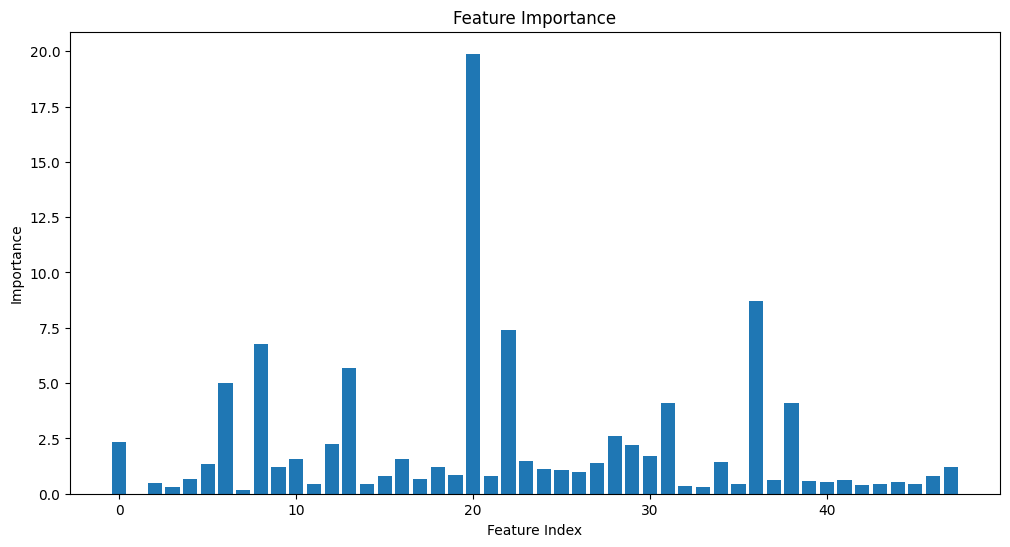

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/synthetic_data_tvae.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.drop(columns=['TYPE'])
y = data['TYPE'].values

print("Columns successfully dropped and features/target separated.")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the CatBoost classifier
model = CatBoostClassifier(iterations=50, learning_rate=0.1, depth=6, verbose=10, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Calculate training accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))

# Calculate test accuracy
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Plot feature importance
feature_importance = model.get_feature_importance()
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


In [ ]:
#BORUTA + SAINT
!pip install boruta

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv("/content/synthetic_data_tvae.csv")
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Random Forest and Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
boruta = BorutaPy(estimator=rf, n_estimators='auto', random_state=42, max_iter=100)

# Fit Boruta
boruta.fit(X_scaled, y.values)

# Select features
selected_features = X.columns[boruta.support_].tolist()
X_selected = df[selected_features]
X_selected['TYPE'] = y

# Save to CSV
X_selected.to_csv('sel_features_tvae.csv', index=False)
print(f"Selected {len(selected_features)} features saved to 'sel_features.csv'.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00
Selected 25 features saved to 'sel_features.csv'.


<ipython-input-1-8344045>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['TYPE'] = y


Epoch 10/10, Loss: 0.1340, Train Acc: 0.9812, Test Acc: 0.9775

Final Test Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       295
           1       0.94      0.98      0.96       105

    accuracy                           0.98       400
   macro avg       0.96      0.98      0.97       400
weighted avg       0.98      0.98      0.98       400


Confusion Matrix:
[[288   7]
 [  2 103]]

ROC-AUC Score: 0.9976


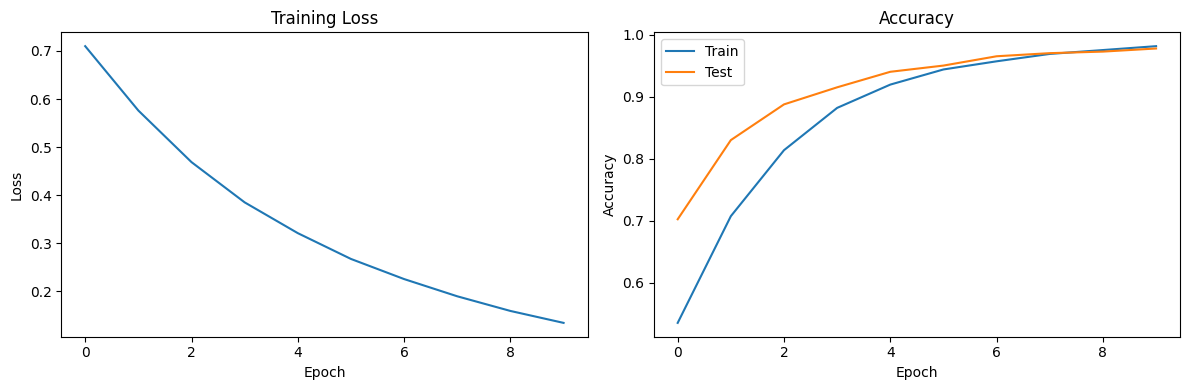

In [ ]:
# Load the synthetic data from CSV and prepare it for the SAINT model
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load the data
file_path = '/content/sel_features_tvae.csv'
data = pd.read_csv(file_path)

# Split features and target
X = data.values
y = data['TYPE'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=3):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    # Calculate test accuracy
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    # Store metrics
    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")

# Classification Metrics (From Code 1)
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC Score (for binary classification)
if len(set(y_test.numpy())) == 2:  # Ensure binary classification
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()  # Get probabilities for class 1
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



=== Feature Scores (Mutual Information) ===
      Feature  MI Score
20        Age  0.197446
36        NEU  0.096322
8   Menopause  0.087405
31       LYM%  0.079776
29      CA125  0.070284
22        PDW  0.064829
23       CREA  0.037391
35        PLT  0.036510
6       BASO%  0.030578
41        PCT  0.030466
38         TP  0.028565
47        ALP  0.027323
13        ALB  0.026343
18        ALT  0.023851
5         AST  0.019051
24        AFP  0.018727
40        RBC  0.018622
3        GLU.  0.016069
9          CL  0.015085
28       LYM#  0.014991
34      MONO#  0.014298
1       BASO#  0.012357
12     CA19-9  0.011411
39         UA  0.010819
21        RDW  0.008210
2        PHOS  0.005711
45      MONO%  0.005693
4           K  0.005080
33         AG  0.004809
19       DBIL  0.004285
46        MCV  0.004117
7          Mg  0.003826
27        HE4  0.003552
15        GGT  0.003465
10        CEA  0.003148
14       IBIL  0.001229
42      CO2CP  0.000898
11        EO#  0.000413
0         MPV  0.00

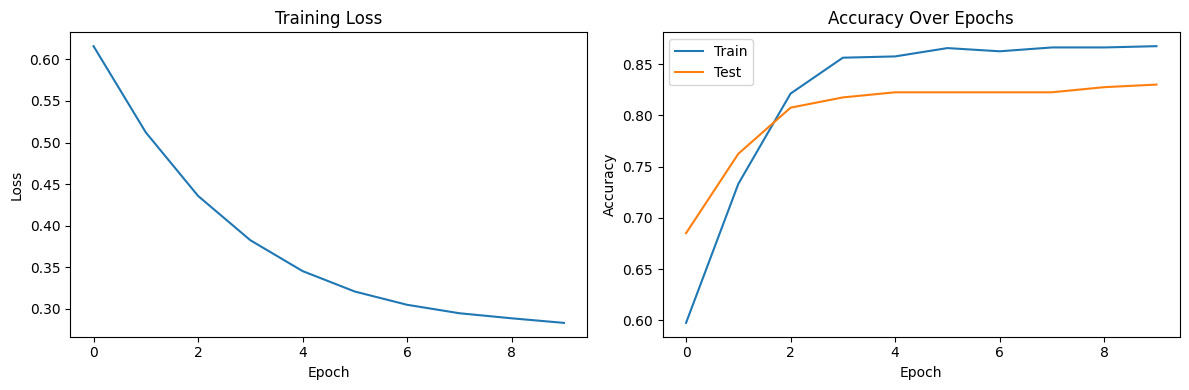

In [ ]:
#MI+SAINT
# Step 1: MI Feature Selection
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('/content/synthetic_data_tvae.csv')  # <-- Update this path

# Separate features and target
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Ensure column names are strings
X.columns = X.columns.astype(str)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mutual Information scores
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Feature Scores (Mutual Information) ===")
print(feature_scores)

# Select top 10 features
top_features = feature_scores['Feature'][:10].tolist()
print("\n=== Top 10 Selected Features ===")
print(top_features)

X_selected = df[top_features]

# Step 2: Train/Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: SAINT Model Setup
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Define SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final Evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\n=== Final Test Accuracy: {final_accuracy:.4f} ===")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC (binary only)
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"=== ROC-AUC Score: {roc_auc:.4f} ===")

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



✅ Best Alpha: 0.0041

=== Feature Scores ===
      Feature  Coefficient
22        PDW     0.053128
31       LYM%     0.041761
6       BASO%     0.038774
28       LYM#     0.032609
7          Mg     0.031812
13        ALB     0.026765
29      CA125     0.021864
16        MCH     0.021727
23       CREA     0.020020
38         TP     0.018731
1       BASO#     0.017513
33         AG     0.017014
25        HGB     0.011442
4           K     0.007105
44        HCT     0.006587
46        MCV     0.006285
21        RDW     0.006001
32         Ca     0.005970
2        PHOS     0.002136
45      MONO%     0.002060
43       TBIL     0.001348
39         UA    -0.000000
41        PCT    -0.000000
24        AFP     0.000000
18        ALT    -0.000000
14       IBIL     0.000000
30        BUN    -0.000000
37        EO%     0.000000
19       DBIL    -0.000000
42      CO2CP    -0.000723
40        RBC    -0.000844
26         Na    -0.003355
12     CA19-9    -0.004021
15        GGT    -0.004478
3        

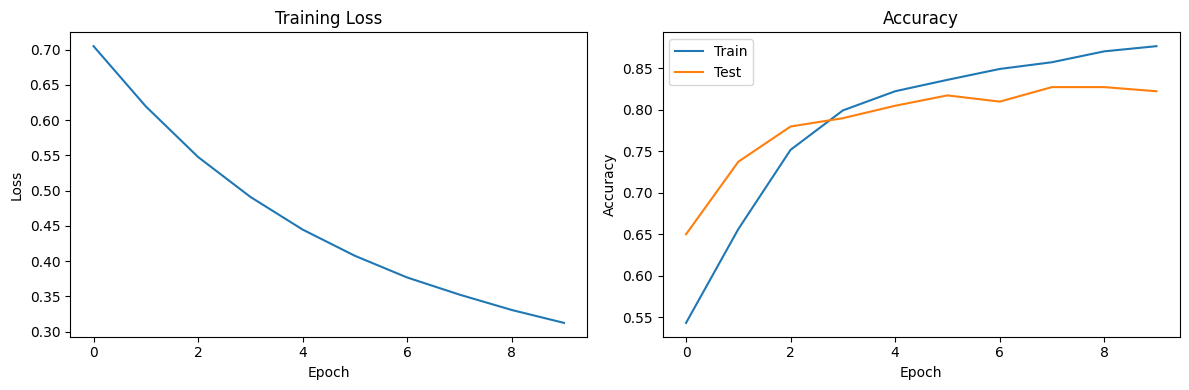

In [ ]:
# --- LASSO + SAINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataset
df = pd.read_csv('/content/synthetic_data_tvae.csv')  # <-- Change path
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LASSO with CV
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=42)
lasso_cv.fit(X_train_fs, y_train_fs)

best_alpha = lasso_cv.alpha_
print(f"\n✅ Best Alpha: {best_alpha:.4f}")

lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train_fs, y_train_fs)

# Feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n=== Feature Scores ===")
print(feature_scores)

# Select non-zero features
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
print(f"\n✅ Selected Features ({len(selected_features)}):\n{selected_features}")

# Filter dataframe to selected features
X_selected = df[selected_features]

# --- SAINT Classification ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Train-test split on selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        return self.classifier(x)

# Initialize model
num_classes = len(np.unique(y))  # supports multi-class
model = SimpleSAINT(input_dim=X_train.shape[1], hidden_dim=64, num_heads=4, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, pred_train = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train.numpy(), pred_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, pred_test = torch.max(test_outputs, 1)
        test_acc = accuracy_score(y_test.numpy(), pred_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

# Final metrics
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, final_pred = torch.max(final_outputs, 1)

print(f"\n✅ Final Test Accuracy: {accuracy_score(y_test.numpy(), final_pred.numpy()):.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test.numpy(), final_pred.numpy()))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.numpy(), final_pred.numpy()))

# ROC-AUC only for binary
if num_classes == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    auc_score = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {auc_score:.4f}")

# --- Plotting ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Best Alpha: 0.0376, Best L1 Ratio: 0.10
Epoch 1/10, Loss: 0.6694, Train Acc: 0.5931, Test Acc: 0.6875
Epoch 2/10, Loss: 0.5827, Train Acc: 0.7125, Test Acc: 0.7500
Epoch 3/10, Loss: 0.5127, Train Acc: 0.7788, Test Acc: 0.7775
Epoch 4/10, Loss: 0.4595, Train Acc: 0.8125, Test Acc: 0.7925
Epoch 5/10, Loss: 0.4140, Train Acc: 0.8331, Test Acc: 0.7950
Epoch 6/10, Loss: 0.3786, Train Acc: 0.8456, Test Acc: 0.8050
Epoch 7/10, Loss: 0.3511, Train Acc: 0.8556, Test Acc: 0.8175
Epoch 8/10, Loss: 0.3272, Train Acc: 0.8612, Test Acc: 0.8225
Epoch 9/10, Loss: 0.3076, Train Acc: 0.8662, Test Acc: 0.8350
Epoch 10/10, Loss: 0.2906, Train Acc: 0.8750, Test Acc: 0.8425

Final Test Accuracy: 0.8425

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       295
           1       0.69      0.73      0.71       105

    accuracy                           0.84       400
   macro avg       0.80      0.81      0.80       400
weighted avg  

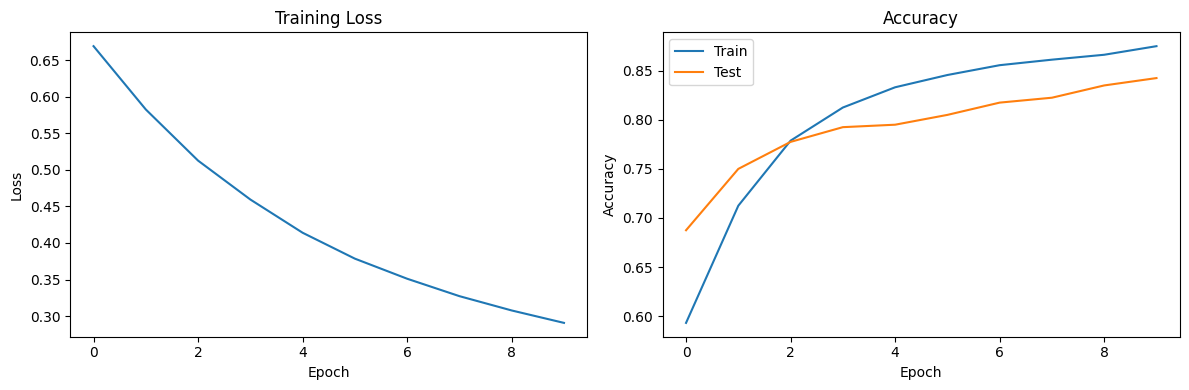

In [ ]:
# ELASTICNET + SAINT
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load your dataframe
df = pd.read_csv("/content/synthetic_data_tvae.csv")

# Separate features and target variable
X = df.drop(columns=['TYPE'])
y = df['TYPE']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ElasticNetCV for feature selection
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 1, 100),
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42
)
elasticnet_cv.fit(X_train_full, y_train_full)

# Best hyperparameters
best_alpha = elasticnet_cv.alpha_
best_l1_ratio = elasticnet_cv.l1_ratio_
print(f"Best Alpha: {best_alpha:.4f}, Best L1 Ratio: {best_l1_ratio:.2f}")

# Fit final ElasticNet model
elasticnet = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)
elasticnet.fit(X_train_full, y_train_full)

# Get non-zero coefficient features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': elasticnet.coef_
}).sort_values(by='Coefficient', ascending=False)
selected_features = feature_scores[feature_scores['Coefficient'] != 0]['Feature'].tolist()
X_selected = df[selected_features]

# Save selected features (optional)
# X_selected.to_csv("sel_features.csv", index=False)

# Recreate X and y with selected features
X = X_selected.values
y = df['TYPE'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define the SAINT model
class SimpleSAINT(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, num_classes=2):
        super(SimpleSAINT, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        if len(x.shape) == 2:
            x = x.unsqueeze(1)
        attention_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attention_out)
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)
        x = torch.mean(x, dim=1)
        x = self.classifier(x)
        return x

# Initialize model
input_dim = X_train.shape[1]
model = SimpleSAINT(input_dim=input_dim, hidden_dim=64, num_heads=4, num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    _, predicted_train = torch.max(outputs.data, 1)
    train_acc = accuracy_score(y_train.numpy(), predicted_train.numpy())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted_test = torch.max(test_outputs.data, 1)
        test_acc = accuracy_score(y_test.numpy(), predicted_test.numpy())

    train_losses.append(loss.item())
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

# Final evaluation
model.eval()
with torch.no_grad():
    final_outputs = model(X_test)
    _, predicted = torch.max(final_outputs.data, 1)
    final_accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test.numpy(), predicted.numpy()))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), predicted.numpy()))

# ROC-AUC Score for binary
if len(set(y_test.numpy())) == 2:
    y_probs = F.softmax(final_outputs, dim=1)[:, 1].numpy()
    roc_auc = roc_auc_score(y_test.numpy(), y_probs)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
